ARIMA (Autoregressive Integrated Moving Average): ARIMA is a classical time series algorithm that is widely used for forecasting. It models the time series as a combination of autoregressive, integrated, and moving average terms. ARIMA is particularly effective for modeling stationary time series.

In this notebook using the ARIMA (Autoregressive Integrated Moving Average) analyze.

1. Import the necessary libraries.

In [1]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima

2. Load the dataset and prepare the data.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/'Colab Notebooks'/'final ml'/

/content/drive/MyDrive/Colab Notebooks/final ml


In [5]:
df = pd.read_csv('data.zip', parse_dates=['utc_timestamp'])
df.set_index('utc_timestamp', inplace=True)
df.dropna(inplace=True)

3. Visualize the data.

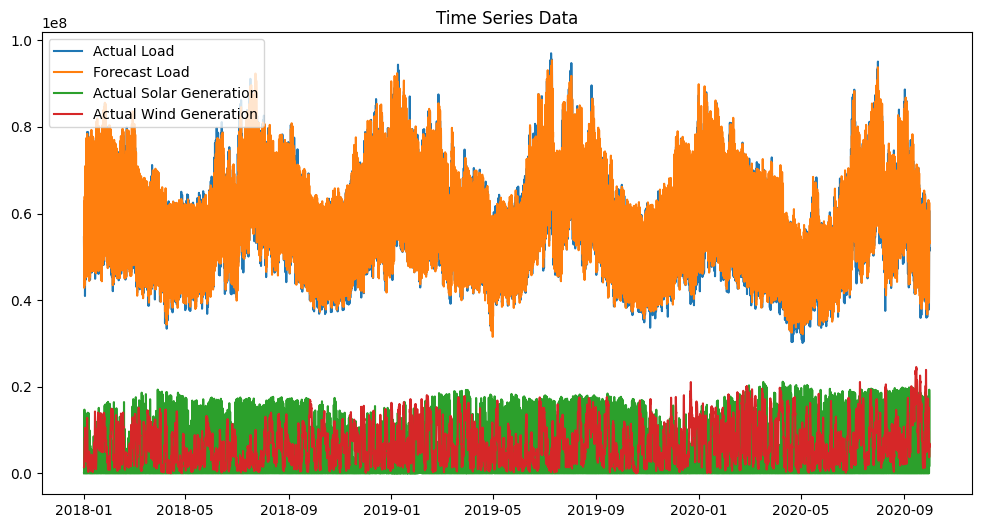

In [6]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df['GR_load_actual_entsoe_transparency'], label='Actual Load')
ax.plot(df['GR_load_forecast_entsoe_transparency'], label='Forecast Load')
ax.plot(df['GR_solar_generation_actual'], label='Actual Solar Generation')
ax.plot(df['GR_wind_onshore_generation_actual'], label='Actual Wind Generation')
ax.set_title('Time Series Data')
ax.legend()
plt.show()

A) Analyze the data from collum GR_load_actual_entsoe_transparency.

A1) Check for stationarity.

In [7]:
result = sm.tsa.stattools.adfuller(df['GR_load_actual_entsoe_transparency'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.561818
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The p value is 0.000 is low the 0.05. The timeseries is stationary.

A2) Fit the ARIMA model.

In [8]:
model = auto_arima(df['GR_load_actual_entsoe_transparency'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=764906.625, Time=17.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=789456.090, Time=0.70 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770295.286, Time=2.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=774575.371, Time=4.72 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=789454.091, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=768819.108, Time=8.78 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=765053.745, Time=15.96 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=51.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=764789.793, Time=37.56 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=768047.694, Time=14.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=764572.617, Time=33.23 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=88.41 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=764499.835, Time=43.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=764551.306, Time=33.30 sec
 ARIMA(4,1

A3) Evaluate the model: Use the predict function to make predictions on the test set and calculate the root mean squared error (RMSE).

In [9]:
train = df['GR_load_actual_entsoe_transparency'].iloc[:-12]
test = df['GR_load_actual_entsoe_transparency'].iloc[-12:]
model.fit(train)
predictions = model.predict(n_periods=12)
print('RMSE:', np.sqrt(((predictions - test) ** 2).mean()))

RMSE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


A4) Visualize the predictions: Visualize the predictions and compare them with the actual values.

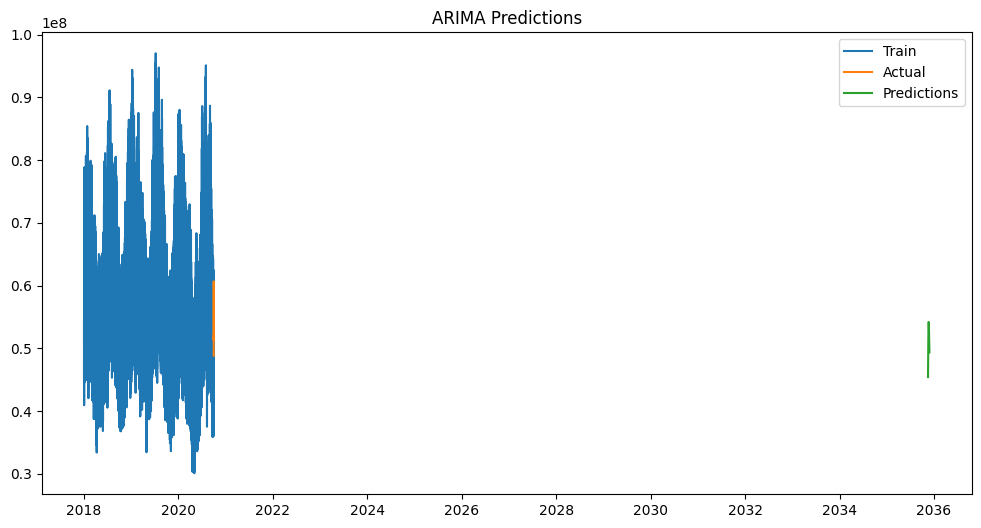

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train, label='Train')
ax.plot(test, label='Actual')
ax.plot(predictions, label='Predictions')
ax.set_title('ARIMA Predictions')
ax.legend()
plt.show()

In [11]:
print('Predictions for 2020:')
print(predictions)
print('Actual for 2020:')
print(test)

Predictions for 2020:
24060    4.542353e+07
24061    4.827820e+07
24062    5.090549e+07
24063    5.268140e+07
24064    5.368239e+07
24065    5.421035e+07
24066    5.386518e+07
24067    5.324477e+07
24068    5.238635e+07
24069    5.118879e+07
24070    5.029158e+07
24071    4.936184e+07
dtype: float64
Actual for 2020:
utc_timestamp
2020-09-30 07:00:00    48829300
2020-09-30 08:00:00    51866700
2020-09-30 09:00:00    56699300
2020-09-30 10:00:00    59324400
2020-09-30 11:00:00    59963000
2020-09-30 12:00:00    60683000
2020-09-30 13:00:00    59905200
2020-09-30 14:00:00    57309600
2020-09-30 15:00:00    54244800
2020-09-30 16:00:00    51964000
2020-09-30 17:00:00    51317100
2020-09-30 18:00:00    51973500
Name: GR_load_actual_entsoe_transparency, dtype: int64


-----------------------------------------------------------------------------------------
B) Analyze the data from collum GR_load_forecast_entsoe_transparency.

B1) Check for stationarity.

In [12]:
result = sm.tsa.stattools.adfuller(df['GR_load_forecast_entsoe_transparency'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.235575
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The p value is 0.001 is low the 0.05. The timeseries is stationary.

B2) Fit the ARIMA model.

In [13]:
model = auto_arima(df['GR_load_forecast_entsoe_transparency'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=764709.686, Time=16.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=790378.698, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770446.270, Time=2.52 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=775230.942, Time=4.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=790376.698, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=768783.291, Time=8.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=764883.823, Time=15.94 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=54.99 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=764644.679, Time=37.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=768028.760, Time=14.67 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=764463.337, Time=41.83 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=87.97 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=764383.861, Time=60.51 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=764450.702, Time=30.87 sec
 ARIMA(4,1

B3) Evaluate the model: Use the predict function to make predictions on the test set and calculate the root mean squared error (RMSE).

In [14]:
train = df['GR_load_forecast_entsoe_transparency'].iloc[:-12]
test = df['GR_load_forecast_entsoe_transparency'].iloc[-12:]
model.fit(train)
predictions = model.predict(n_periods=12)
print('RMSE:', np.sqrt(((predictions - test) ** 2).mean()))

RMSE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


B4) Visualize the predictions: Visualize the predictions and compare them with the actual values.

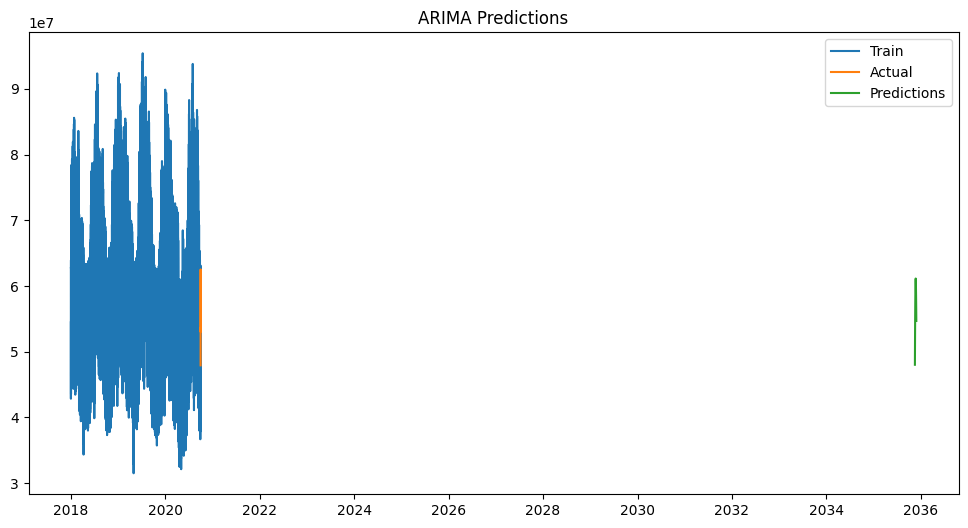

In [15]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train, label='Train')
ax.plot(test, label='Actual')
ax.plot(predictions, label='Predictions')
ax.set_title('ARIMA Predictions')
ax.legend()
plt.show()

In [16]:
print('Predictions for 2020:')
print(predictions)
print('Actual for 2020:')
print(test)

Predictions for 2020:
24060    4.801549e+07
24061    5.185250e+07
24062    5.517169e+07
24063    5.765611e+07
24064    5.952495e+07
24065    6.069373e+07
24066    6.113299e+07
24067    6.086623e+07
24068    5.996439e+07
24069    5.853738e+07
24070    5.672351e+07
24071    5.467779e+07
dtype: float64
Actual for 2020:
utc_timestamp
2020-09-30 07:00:00    47929100
2020-09-30 08:00:00    53457600
2020-09-30 09:00:00    57901100
2020-09-30 10:00:00    60439800
2020-09-30 11:00:00    61694900
2020-09-30 12:00:00    62520600
2020-09-30 13:00:00    61888600
2020-09-30 14:00:00    60031100
2020-09-30 15:00:00    56648700
2020-09-30 16:00:00    54124400
2020-09-30 17:00:00    53025000
2020-09-30 18:00:00    53551000
Name: GR_load_forecast_entsoe_transparency, dtype: int64


-----------------------------------------------------------------------------------------
C) Analyze the data from collum GR_solar_generation_actual.

C1) Check for stationarity.

In [17]:
result = sm.tsa.stattools.adfuller(df['GR_solar_generation_actual'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.259678
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The p value is 0.000 is low the 0.05. The timeseries is stationary.

C2) Fit the ARIMA model.

In [18]:
model = auto_arima(df['GR_solar_generation_actual'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=20.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=764946.591, Time=1.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=733693.245, Time=1.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=744618.025, Time=5.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=764944.591, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=723017.595, Time=2.53 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=723014.974, Time=3.31 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=722607.006, Time=5.65 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=722184.695, Time=6.05 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=87.77 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=60.02 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=722182.695, Time=4.35 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=722605.006, Time=2.81 sec
 ARIMA(5,1,1)(0,0,0)[0]             : AIC=inf, Time=68.86 sec
 ARIMA(4,1,1)(0,0,0)[0]      

C3) Evaluate the model: Use the predict function to make predictions on the test set and calculate the root mean squared error (RMSE).

In [19]:
train = df['GR_solar_generation_actual'].iloc[:-12]
test = df['GR_solar_generation_actual'].iloc[-12:]
model.fit(train)
predictions = model.predict(n_periods=12)
print('RMSE:', np.sqrt(((predictions - test) ** 2).mean()))

RMSE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


C4) Visualize the predictions: Visualize the predictions and compare them with the actual values.

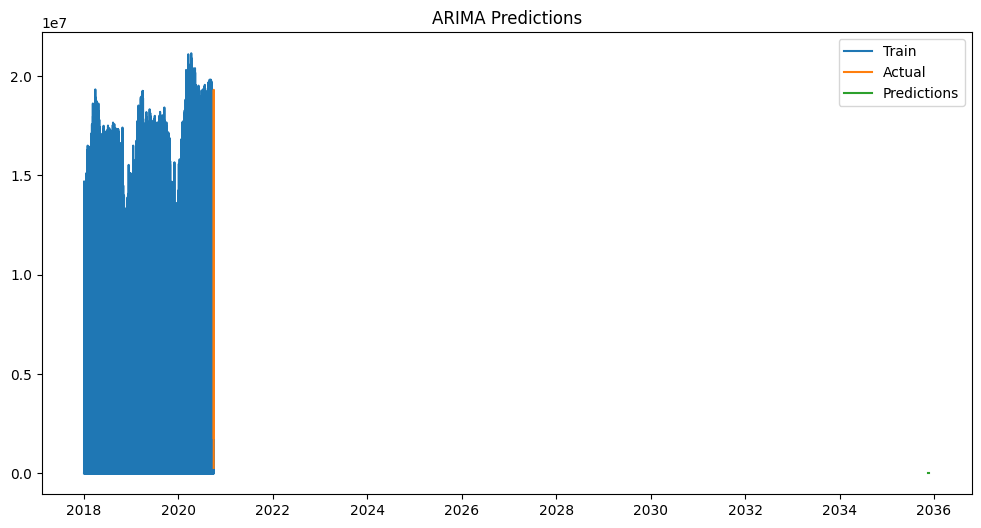

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train, label='Train')
ax.plot(test, label='Actual')
ax.plot(predictions, label='Predictions')
ax.set_title('ARIMA Predictions')
ax.legend()
plt.show()

In [21]:
print('Predictions for 2020:')
print(predictions)
print('Actual for 2020:')
print(test)

Predictions for 2020:
24060   -7.738259e-28
24061   -7.107229e-27
24062   -1.281375e-26
24063   -1.658644e-26
24064   -1.851140e-26
24065   -1.937587e-26
24066   -1.908771e-26
24067   -1.774846e-26
24068   -1.581328e-26
24069   -1.385117e-26
24070   -1.222900e-26
24071   -1.112447e-26
dtype: float64
Actual for 2020:
utc_timestamp
2020-09-30 07:00:00      270000.0
2020-09-30 08:00:00     3980000.0
2020-09-30 09:00:00     9750000.0
2020-09-30 10:00:00    14410000.0
2020-09-30 11:00:00    17690000.0
2020-09-30 12:00:00    19310000.0
2020-09-30 13:00:00    19080000.0
2020-09-30 14:00:00    17830000.0
2020-09-30 15:00:00    15530000.0
2020-09-30 16:00:00    11690000.0
2020-09-30 17:00:00     6900000.0
2020-09-30 18:00:00     1780000.0
Name: GR_solar_generation_actual, dtype: float64


-----------------------------------------------------------------------------------------
D) Analyze the data from collum GR_wind_onshore_generation_actual.

D1) Check for stationarity.

In [22]:
result = sm.tsa.stattools.adfuller(df['GR_wind_onshore_generation_actual'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.911020
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


The p value is 0.000 is low the 0.05. The timeseries is stationary.

D2) Fit the ARIMA model.

In [23]:
model = auto_arima(df['GR_wind_onshore_generation_actual'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=695722.555, Time=8.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=706238.618, Time=0.68 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=695799.776, Time=1.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=697963.684, Time=3.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=706236.621, Time=0.39 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=695720.728, Time=8.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=696466.151, Time=4.59 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=695763.193, Time=4.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=695721.810, Time=10.93 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=696034.785, Time=5.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=695737.842, Time=16.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=55.78 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=695718.728, Time=5.97 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=696464.151, Time=3.37 sec
 ARIMA(1,

D3) Evaluate the model: Use the predict function to make predictions on the test set and calculate the root mean squared error (RMSE).

In [24]:
train = df['GR_wind_onshore_generation_actual'].iloc[:-12]
test = df['GR_wind_onshore_generation_actual'].iloc[-12:]
model.fit(train)
predictions = model.predict(n_periods=12)
print('RMSE:', np.sqrt(((predictions - test) ** 2).mean()))

RMSE: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


D4) Visualize the predictions: Visualize the predictions and compare them with the actual values.

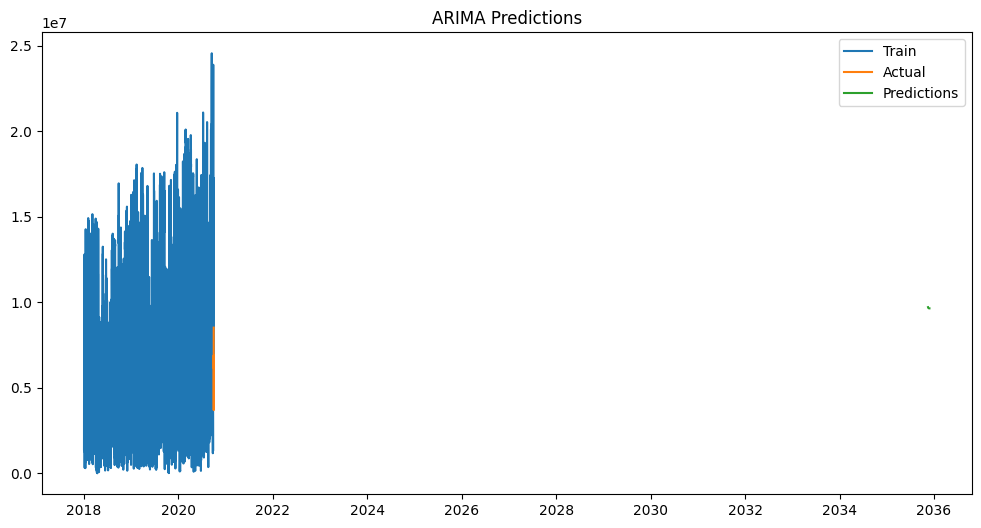

In [25]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(train, label='Train')
ax.plot(test, label='Actual')
ax.plot(predictions, label='Predictions')
ax.set_title('ARIMA Predictions')
ax.legend()
plt.show()

In [26]:
print('Predictions for 2020:')
print(predictions)
print('Actual for 2020:')
print(test)

Predictions for 2020:
24060    9.715729e+06
24061    9.690254e+06
24062    9.674105e+06
24063    9.663869e+06
24064    9.657380e+06
24065    9.653267e+06
24066    9.650659e+06
24067    9.649006e+06
24068    9.647959e+06
24069    9.647294e+06
24070    9.646873e+06
24071    9.646606e+06
dtype: float64
Actual for 2020:
utc_timestamp
2020-09-30 07:00:00    8520000.0
2020-09-30 08:00:00    5870000.0
2020-09-30 09:00:00    4390000.0
2020-09-30 10:00:00    3700000.0
2020-09-30 11:00:00    3780000.0
2020-09-30 12:00:00    4120000.0
2020-09-30 13:00:00    4980000.0
2020-09-30 14:00:00    5880000.0
2020-09-30 15:00:00    6290000.0
2020-09-30 16:00:00    6470000.0
2020-09-30 17:00:00    6910000.0
2020-09-30 18:00:00    6180000.0
Name: GR_wind_onshore_generation_actual, dtype: float64
